# Strategy Learner


---

This notebook provides an example of how a StrategyLearner works. This code is also available in the `__main__` function of `StrategyLearner.py`.

## Summary

We choose a stock, an in-sample period and an out-of-sample period. We train a StrategyLearner on the data from the in-sample period and test it on the out-of-sample period. Then we report the performances of the portfolio (only consisting of the stock) and benchmark for both periods. Benchmark is The performance of a portfolio starting with ``$``100,000 cash, investing in 1000 shares of JPM and holding that position.

* In this notebook, we choose the CME S&P 500 Emini futures contract (March Contracts ESH2009 and ESH2010)
* The in sample/development period is January 1, 2008 to December 31 2009.
* The out of sample/testing period is January 1, 2010 to December 31 2011.
* Starting cash is ``$``100,000.
* Allowable positions are: 5 contracts Long, 5 contracts short, 0 shares.
* There is no limit on leverage.
* Transaction costs: Commission: $0.00, Impact: 0.0.

__*The performance of portfolio is better than benchmark in both periods!*__

## Table of contents:
[1) In-sample performance](#first)

[2) Out-of-sample performance](#second)

[3) Out-of-sample performance](#third)

Import relevant libraries and modules

In [1]:
import datetime as dt
import pandas as pd


from util import create_df_benchmark
from StrategyLearner import StrategyLearner
from marketsim import compute_portvals_single_symbol, market_simulator
from pandas.plotting import register_matplotlib_converters




Starting cash, symbol of interest, commission, and impact



|Month     | contract| date range              |
|----------|---------|-------------------------|
|March     | ESH2009 | 2009-03-19 to 2007-12-21|
|June      | ESM2009 | 2009-06-18 to 2008-03-20|
|September | ESU2009 | 2009-09-17 to 2008-06-20|
|December  | ESZ2009 | 2009-12-17 to 2008-09-19|





In [2]:
start_val = 100000
symbol = "ESFULL"
commission = 0.00
impact = 0.0
num_shares = 5

---
## 1) In-sample performance <a class="anchor" id="first"></a>

Show the performances of portfolio and benchmark in the in-sample period

Specify the start and end dates for this period

In [3]:
start_date = dt.datetime(2014, 10, 6)
end_date = dt.datetime(2018, 4, 3)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position

In [4]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                              num_shares)
print (df_benchmark_trades)

            Shares
Date              
2014-10-06       5
2018-04-03      -5


Create an instance of StrategyLearner and retrieve a trades dataframe via test_policy

In [23]:
import matplotlib.pyplot as plt
from indicators import plot_bollinger


NameError: name 'norm_price' is not defined

1 -0.016325000000000034
2 -0.002487499999999976
3 0.011500000000000066
4 0.012587499999999974
5 0.012862499999999999
6 0.012862499999999999
7 0.012862499999999999
8 0.012862499999999999
9 0.012862499999999999
10 0.012862499999999999
11 0.012862499999999999
12 0.012862499999999999
13 0.012862499999999999
14 0.012862499999999999
15 0.012862499999999999
16 0.012862499999999999
17 0.012862499999999999
18 0.012862499999999999
19 0.012862499999999999
20 0.012862499999999999
21 0.012862499999999999


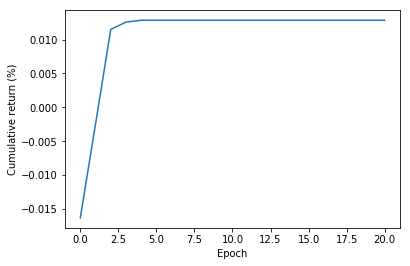

            Shares
Date              
2014-12-10      -5
2014-12-18       5
2014-12-30      -5
2015-01-13       5
2015-01-14      -5
2015-01-15       5
2015-01-16      -5
2015-02-03       5
2015-02-06      -5
2015-02-09       5
2015-03-10      -5
2015-03-18       5
2015-03-19      -5
2015-04-08       5
2015-04-16      -5
2015-04-17       5
2015-04-20      -5
2015-04-21       5
2015-05-22      -5
2015-05-26       5
2015-06-08      -5
2015-06-10       5
2015-06-12      -5
2015-06-23       5
2015-06-24      -5
2015-07-14       5
2015-07-21      -5
2015-07-28       5
2015-08-11      -5
2015-09-22       5
...            ...
2016-05-11      -5
2016-05-26       5
2016-06-24      -5
2016-07-08       5
2016-09-09      -5
2016-10-07       5
2016-10-10      -5
2016-10-11       5
2016-10-13      -5
2016-10-18       5
2016-10-19      -5
2016-10-24       5
2016-10-25      -5
2016-11-08       5
2017-03-21      -5
2017-04-19       5
2017-06-29      -5
2017-07-12       5
2017-08-11      -5
2017-08-16  

In [5]:
# Train and test a StrategyLearner
# Set verbose to True will print out and plot the cumulative return for each training epoch
stl = StrategyLearner(num_shares=num_shares, impact=impact, 
                      commission=commission, verbose=True,
                      num_states=3000, num_actions=3)
stl.add_evidence(symbol=symbol, start_val=start_val, 
                 start_date=start_date, end_date=end_date)
df_trades = stl.test_policy(symbol=symbol, start_date=start_date,
                            end_date=end_date)
print (df_trades)

Retrieve performance stats via a market simulator

Performances during training period for ESFULL
Date Range: 2014-10-06 00:00:00 to 2018-04-03 00:00:00
Sharpe Ratio of Portfolio: 0.3330008704394462
Sharpe Ratio of Benchmark : 0.6518987130617278

Cumulative Return of Portfolio: 0.012862499999999999
Cumulative Return of Benchmark : 0.03286250000000002

Standard Deviation of Portfolio: 0.0007455105739701439
Standard Deviation of Benchmark : 0.0009068029224496715

Average Daily Return of Portfolio: 1.5638637250577202e-05
Average Daily Return of Benchmark : 3.7238550203955216e-05

Final Portfolio Value: 101286.25
Final Benchmark Value: 103286.25


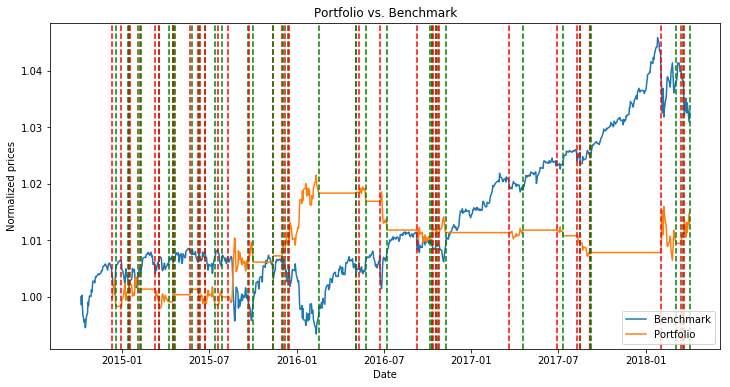

In [6]:
# Retrieve performance stats via a market simulator
print ("Performances during training period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)

---
## 2) Out-of-sample performance <a class="anchor" id="second"></a>

Show the performances of portfolio and benchmark in the out-of-sample period

Specify the start and end dates for this period

In [7]:
start_val = 100000
symbol = "ESFULL"
commission = 0.00
impact = 0.0
num_shares = 5

In [8]:
start_date = dt.datetime(2014, 10, 6)
end_date = dt.datetime(2018, 4, 3)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position.

In [9]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                          num_shares)
print (df_benchmark_trades)

            Shares
Date              
2014-10-06       5
2018-04-03      -5


Use the same StrategyLearner trained above and retrieve a trades dataframe via test_policy

In [10]:
df_trades = stl.test_policy(symbol=symbol, start_date=start_date, 
                            end_date=end_date)
print (df_trades)

            Shares
Date              
2014-12-10      -5
2014-12-18       5
2014-12-30      -5
2015-01-13       5
2015-01-14      -5
2015-01-15       5
2015-01-16      -5
2015-02-03       5
2015-02-06      -5
2015-02-09       5
2015-03-10      -5
2015-03-18       5
2015-03-19      -5
2015-04-08       5
2015-04-16      -5
2015-04-17       5
2015-04-20      -5
2015-04-21       5
2015-05-22      -5
2015-05-26       5
2015-06-08      -5
2015-06-10       5
2015-06-12      -5
2015-06-23       5
2015-06-24      -5
2015-07-14       5
2015-07-21      -5
2015-07-28       5
2015-08-11      -5
2015-09-22       5
...            ...
2016-05-11      -5
2016-05-26       5
2016-06-24      -5
2016-07-08       5
2016-09-09      -5
2016-10-07       5
2016-10-10      -5
2016-10-11       5
2016-10-13      -5
2016-10-18       5
2016-10-19      -5
2016-10-24       5
2016-10-25      -5
2016-11-08       5
2017-03-21      -5
2017-04-19       5
2017-06-29      -5
2017-07-12       5
2017-08-11      -5
2017-08-16  

Retrieve performance stats via a market simulator


Performances during testing period for ESFULL
Date Range: 2014-10-06 00:00:00 to 2018-04-03 00:00:00
Sharpe Ratio of Portfolio: 0.3330008704394462
Sharpe Ratio of Benchmark : 0.6518987130617278

Cumulative Return of Portfolio: 0.012862499999999999
Cumulative Return of Benchmark : 0.03286250000000002

Standard Deviation of Portfolio: 0.0007455105739701439
Standard Deviation of Benchmark : 0.0009068029224496715

Average Daily Return of Portfolio: 1.5638637250577202e-05
Average Daily Return of Benchmark : 3.7238550203955216e-05

Final Portfolio Value: 101286.25
Final Benchmark Value: 103286.25


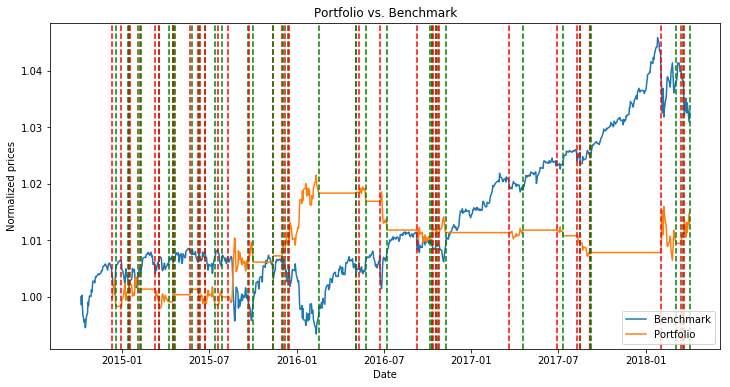

In [11]:
print ("\nPerformances during testing period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)

---
## 3) Out-of-sample performance <a class="anchor" id="third"></a>

Show the performances of portfolio and benchmark in the out-of-sample period

Specify the start and end dates for this period
J7H2009
start_date = dt.datetime(2008, 3, 18)
end_date = dt.datetime(2009, 3, 16)

In [12]:
start_val = 100000
symbol = "SINE_FAST"
commission = 0.00
impact = 0.0
num_shares = 5

In [13]:
start_date = dt.datetime(2008, 12, 19)
end_date = dt.datetime(2010, 3, 19)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position.

In [14]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                          num_shares)
print (df_benchmark_trades)

            Shares
Date              
2008-12-19       5
2010-03-19      -5


Use the same StrategyLearner trained above and retrieve a trades dataframe via test_policy

In [15]:
df_trades = stl.test_policy(symbol=symbol, start_date=start_date, 
                            end_date=end_date)
print (df_trades)

IndexError: single positional indexer is out-of-bounds

Retrieve performance stats via a market simulator

In [ ]:
print ("\nPerformances during testing period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)